In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pandas as pd
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
def setupkde(order,run,burn):
    ws = np.load('../sf/m'+str(order)+'/output/mix_emcee/run0'+str(run)+'/emcee_chain.npy')
    burned = ws[:, burn:,:]
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    nx, ny = fc.shape
    f_omega = 10**fc[:, 7] / (10**fc[:, 5] + 10**fc[:,7])
    burnedT2 = ws[:, burn:, 6] 
    Txs, Tys = burnedT2.shape
    T2 = burnedT2.reshape(Txs*Tys)
    return f_omega, T2

In [15]:
all_avail = [106, 107, 109, 110, 113, 114, 116, 118, 119]
no_plots = [101]
ms_forward = np.array(list(set(all_avail) - set(no_plots)), dtype=np.int)
ms = ms_forward[::-1]

In [16]:
pal = sns.dark_palette("#E16560", as_cmap=True)

0
1
2
3
4
5
6
7
8


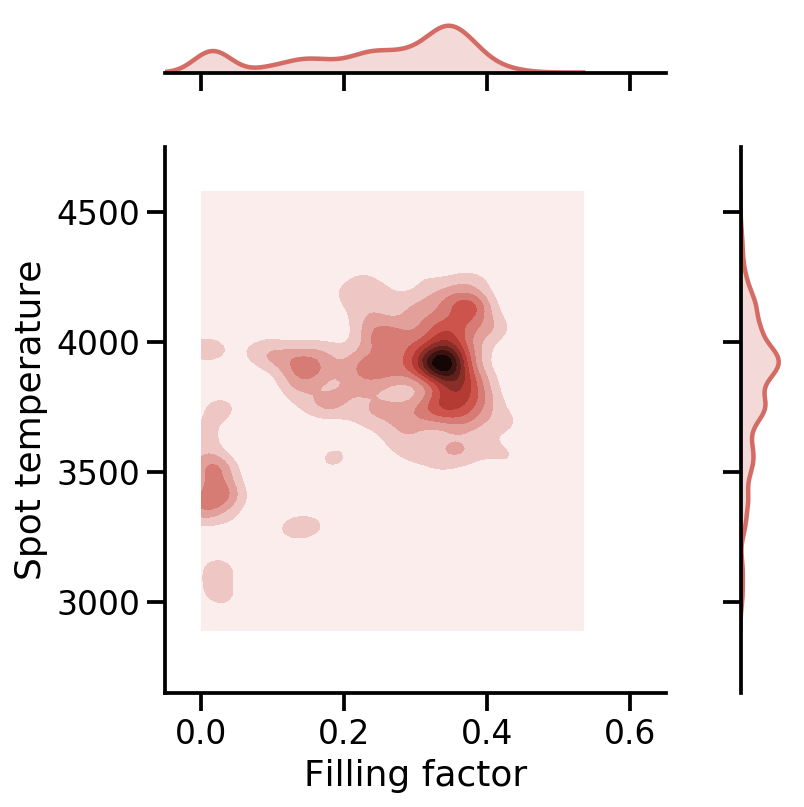

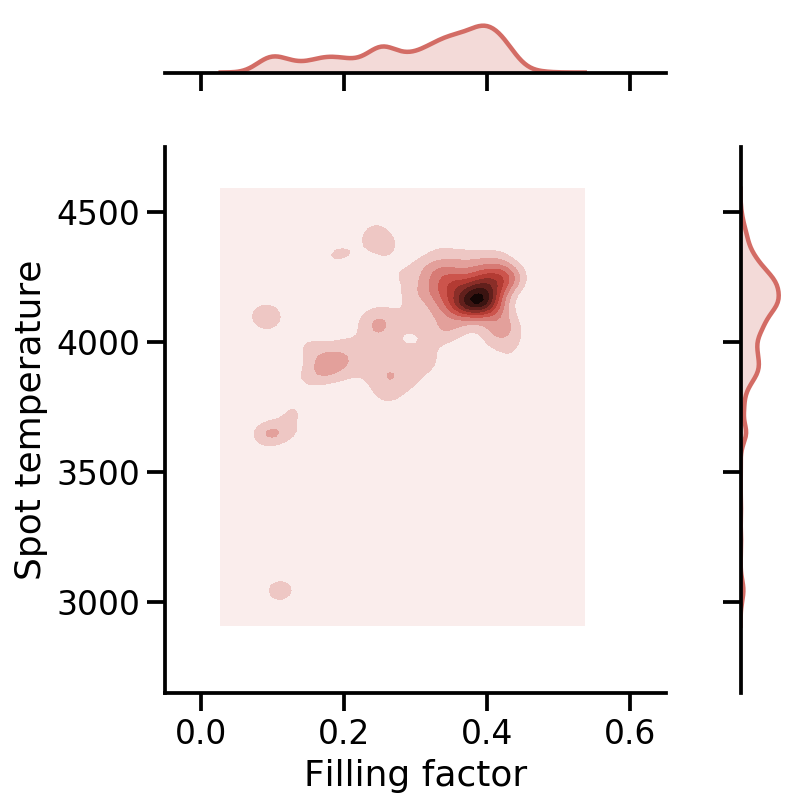

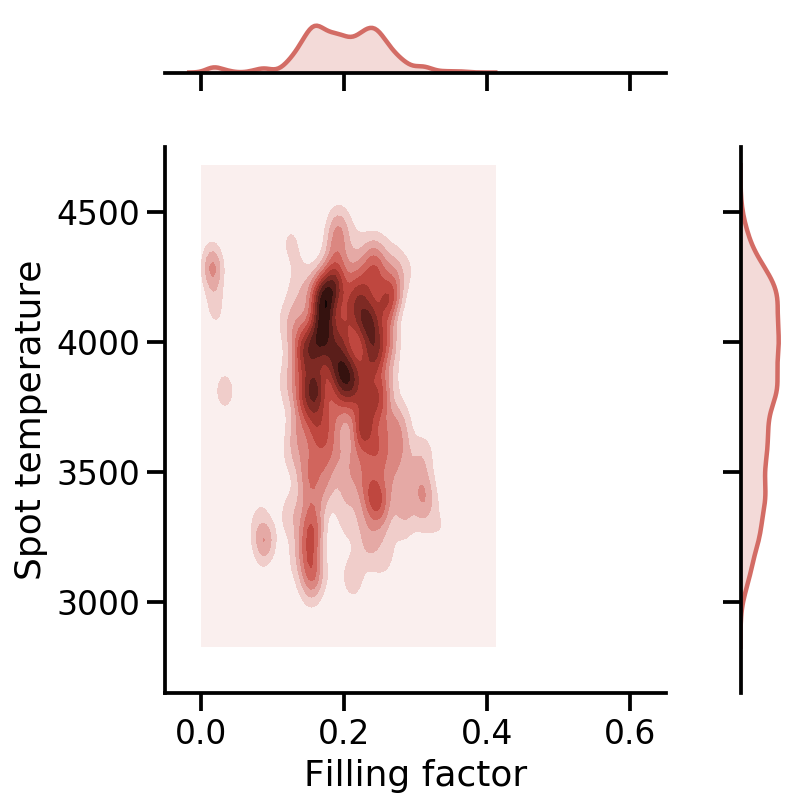

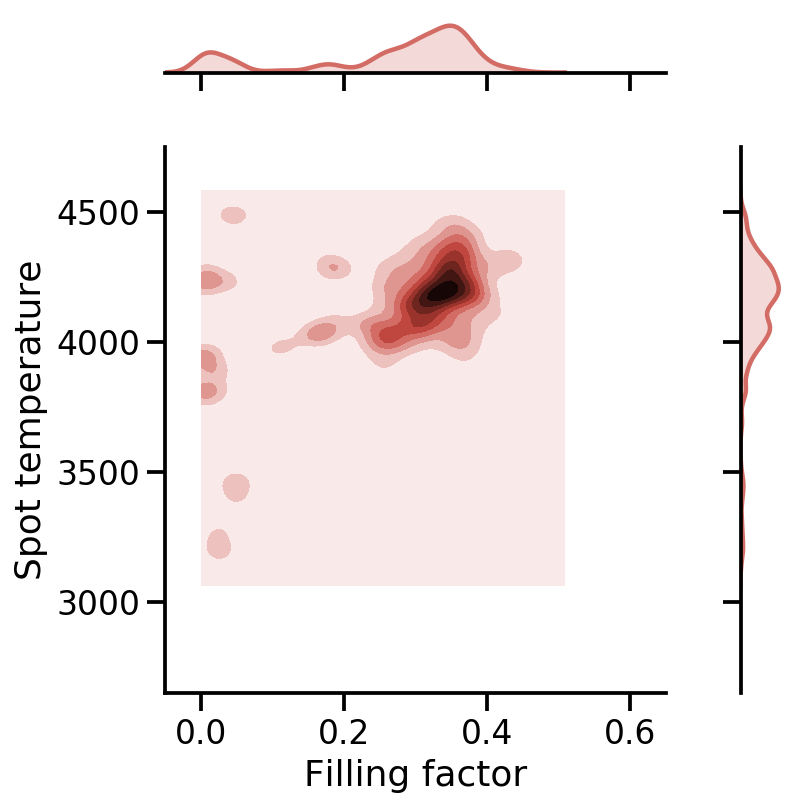

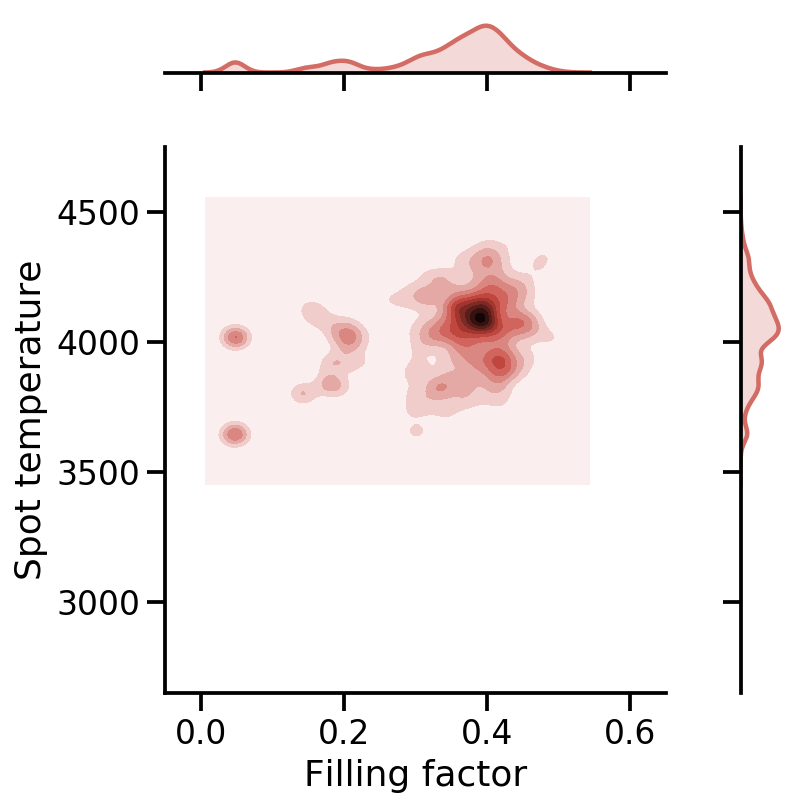

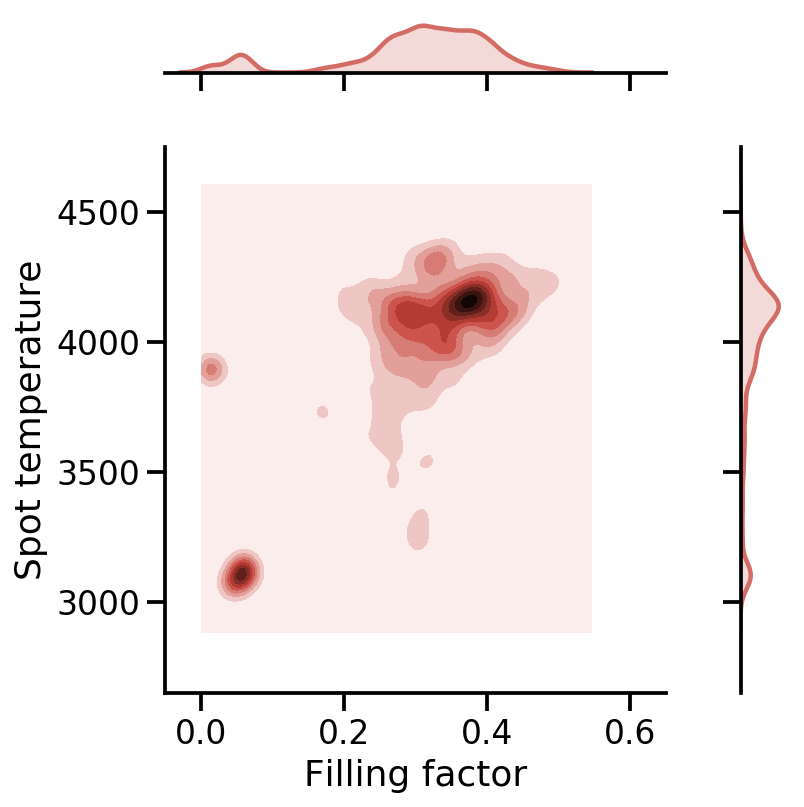

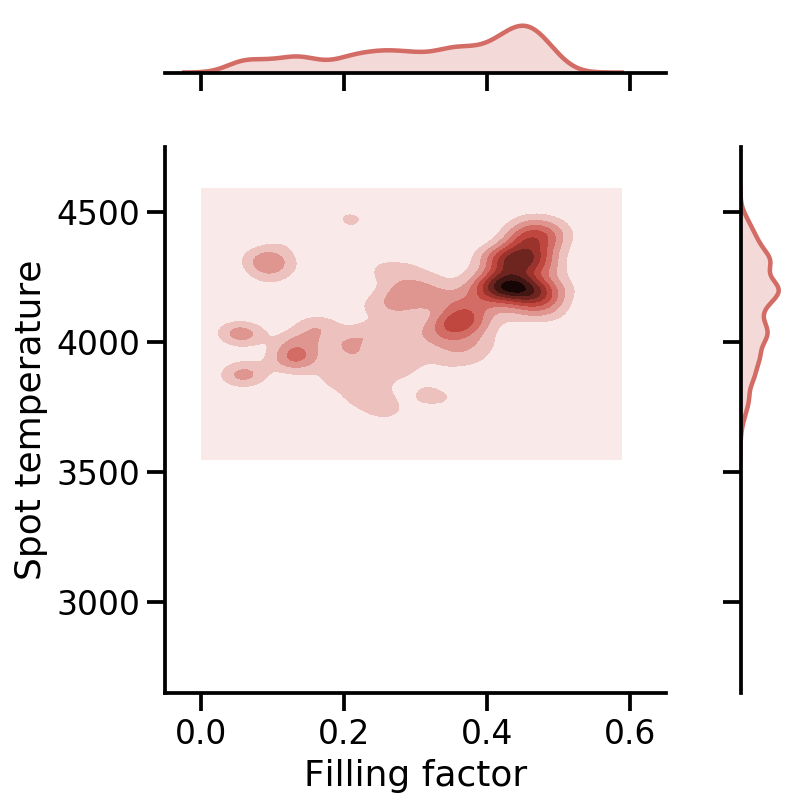

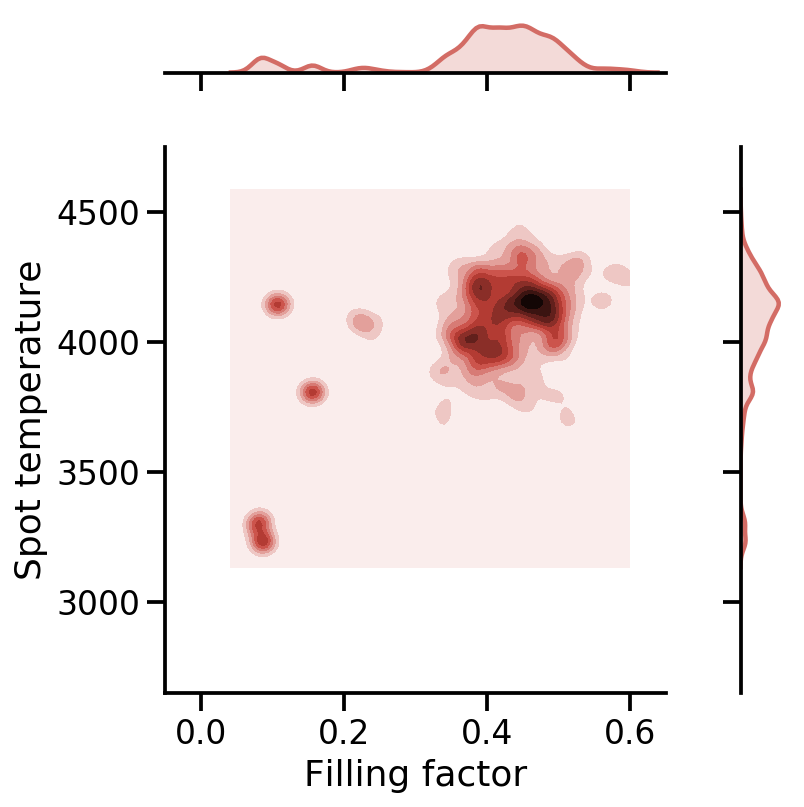

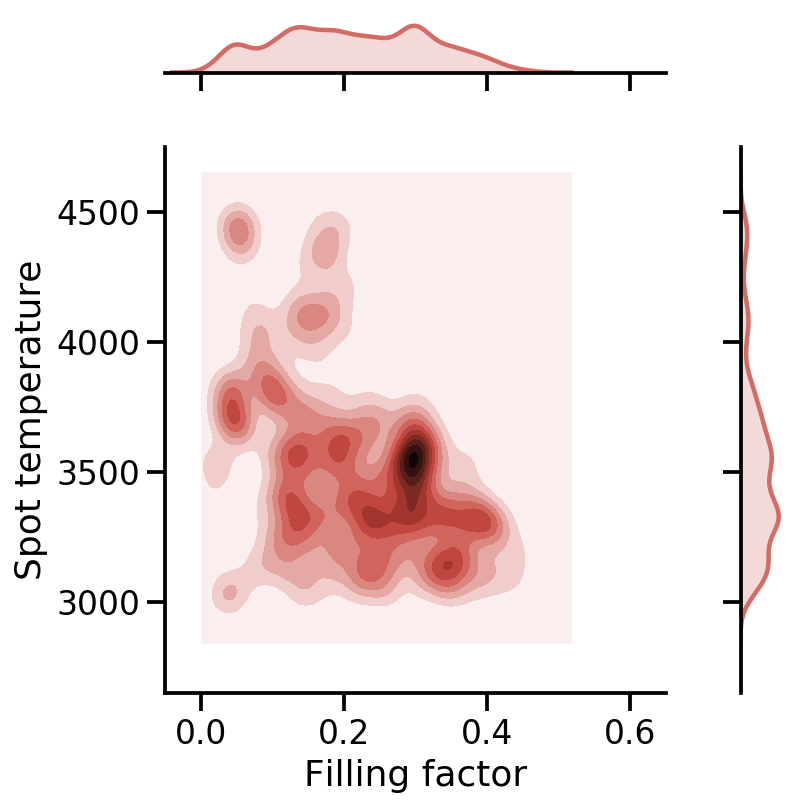

In [27]:
ii = -1

sns.set_context("talk")

for i in range(len(ms)):
    ii += 1
    print(ii)
    m = ms[ii]
    
    try:
        ws = np.load("../sf/m{:03d}/output/mix_emcee/run02/emcee_chain.npy".format(m))
    except:
        ws = np.load("../sf/m{:03d}/output/mix_emcee/run01/emcee_chain.npy".format(m))
    burned = ws[:, -200:,:]
    #I'm only keeping the last 200 samples because that's what Gully did for the spectra plots
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    f_omega = 10**fc[:, 7]/(10**fc[:, 7]+10**fc[:, 5])
    burnedT2 = ws[:, -200:, 6] 
    Txs, Tys = burnedT2.shape
    T2 = burnedT2.reshape(Txs*Tys)
    
    p = sns.jointplot(f_omega, T2, kind='kde', color="#D36C65", clip=((0.0,0.6),(2700,4700)), xlim=[-0.05, 0.65], ylim=[2650, 4750])
    #plt.figure()
    #sns.kdeplot(f_omega, T2, cmap=pal)
    #plt.xlabel("Filling factor")
    #plt.ylabel("Spot temperature (K)")
    p.set_axis_labels("Filling factor", "Spot temperature")
    #p.ax_joint.text(np.min(f_omega), np.max(T2), "m = {}".format(m))
    plt.tight_layout()
    plt.savefig('../document/figures/Tspot_fillingfactor_m{}_AAS.pdf'.format(m), bbox_inches='tight', dpi=300, transparent=True)


Let's see what hex bins look like:

0
1
2
3
4
5
6
7
8


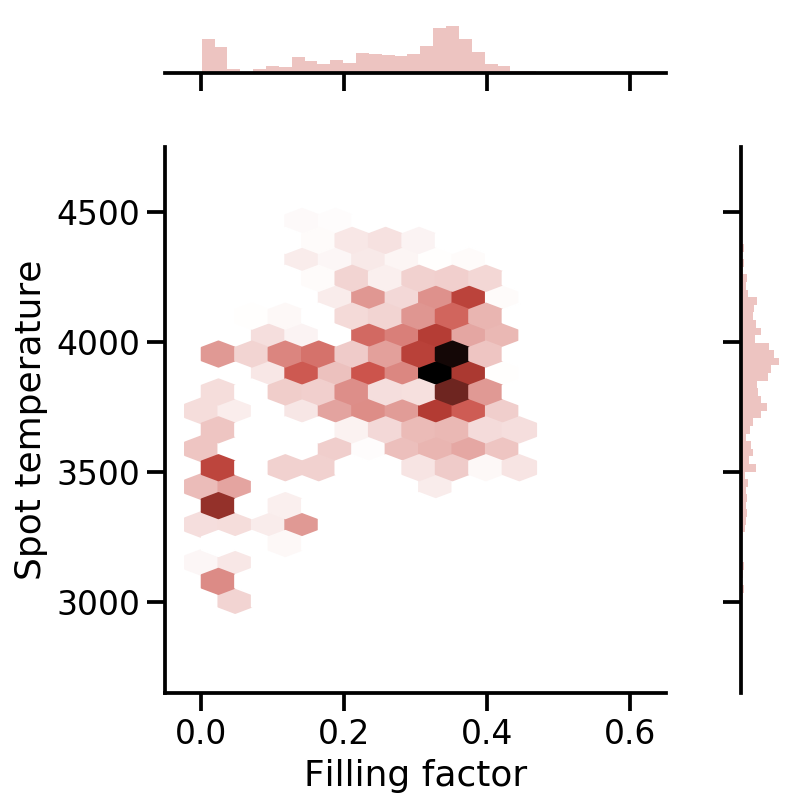

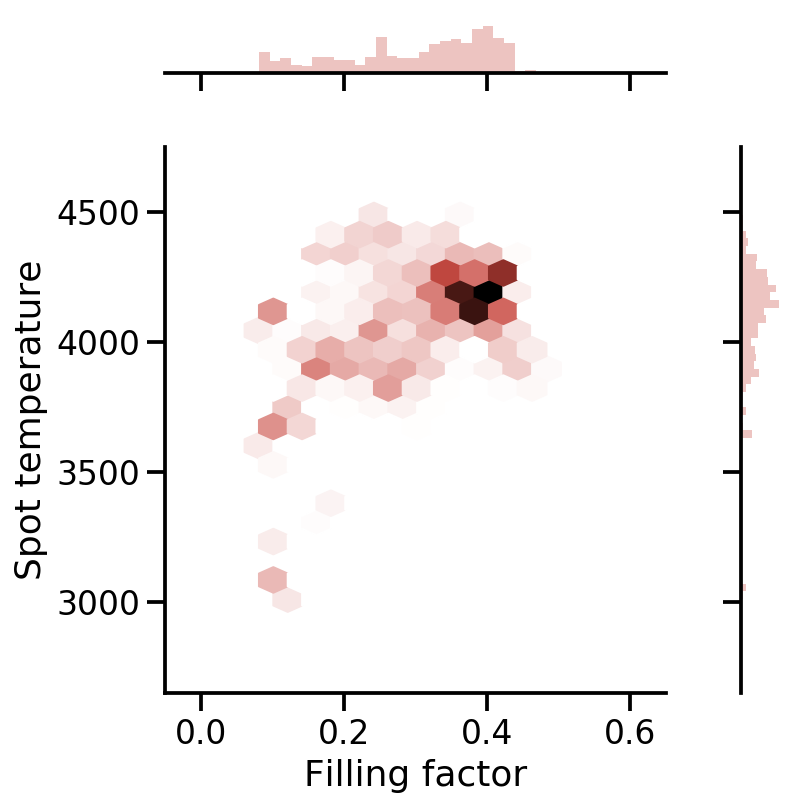

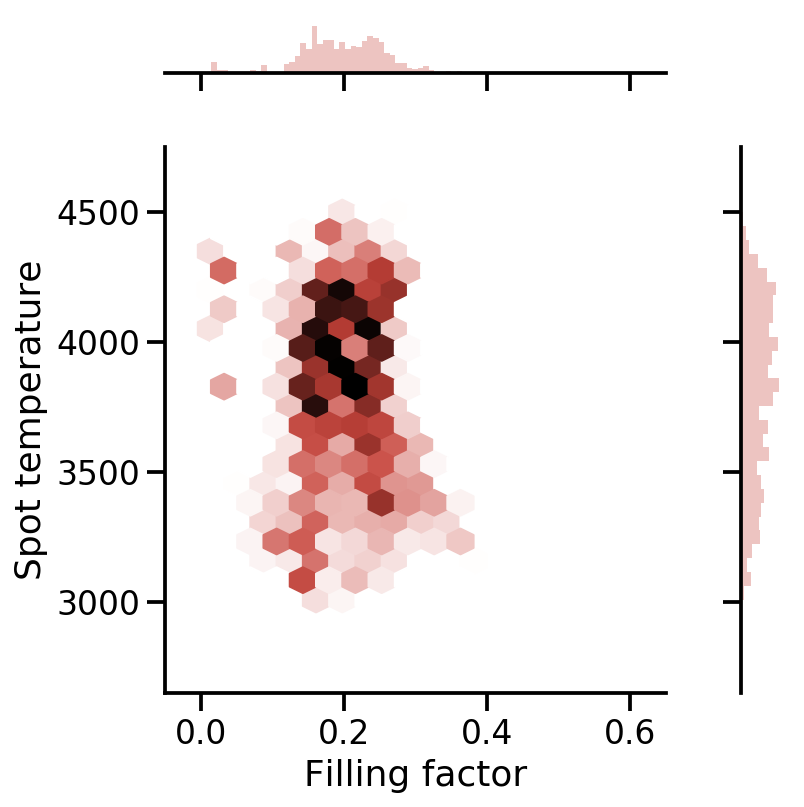

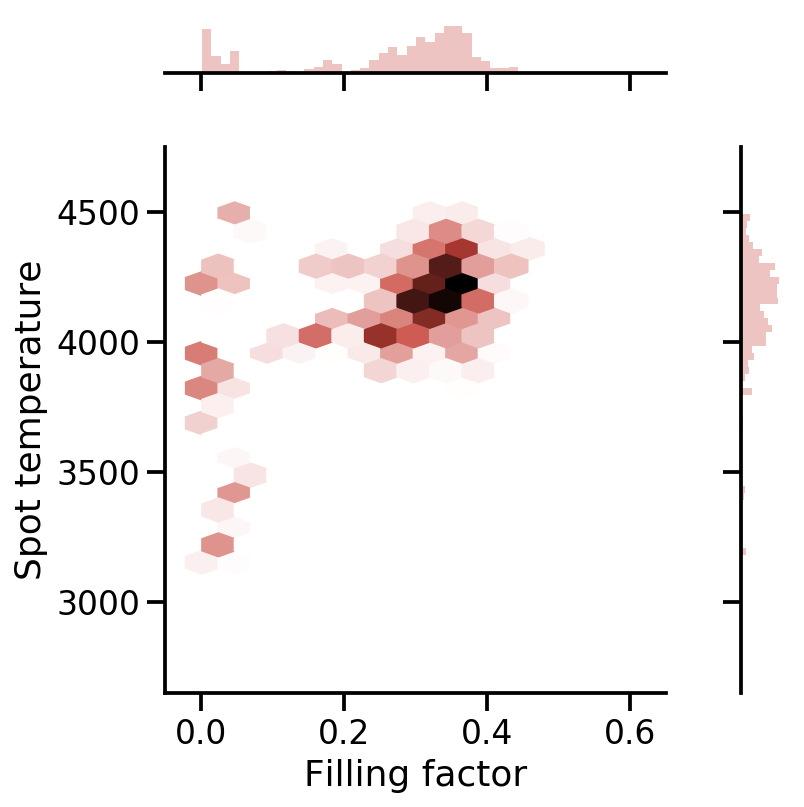

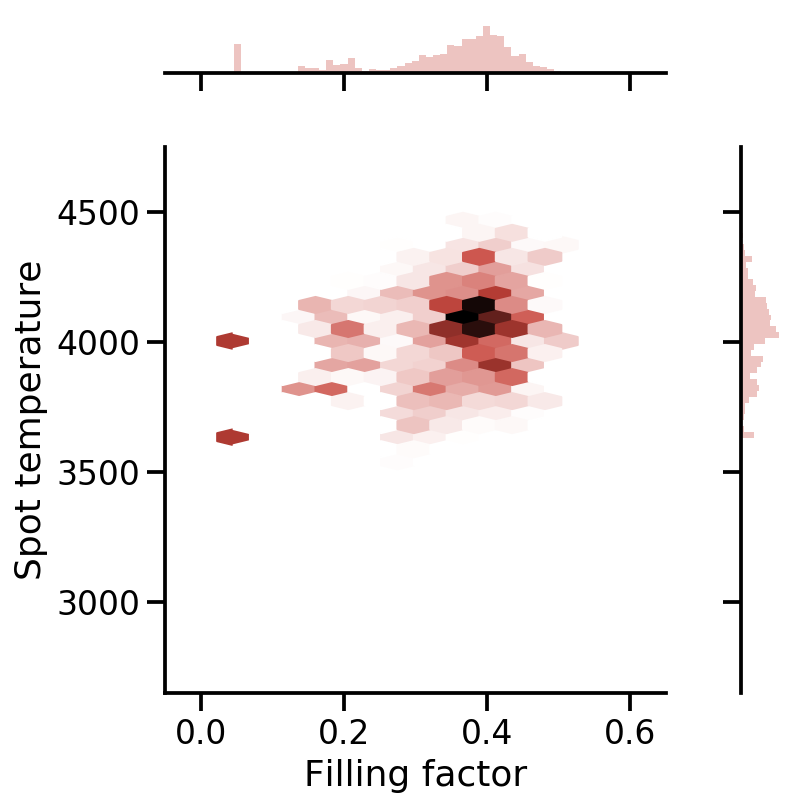

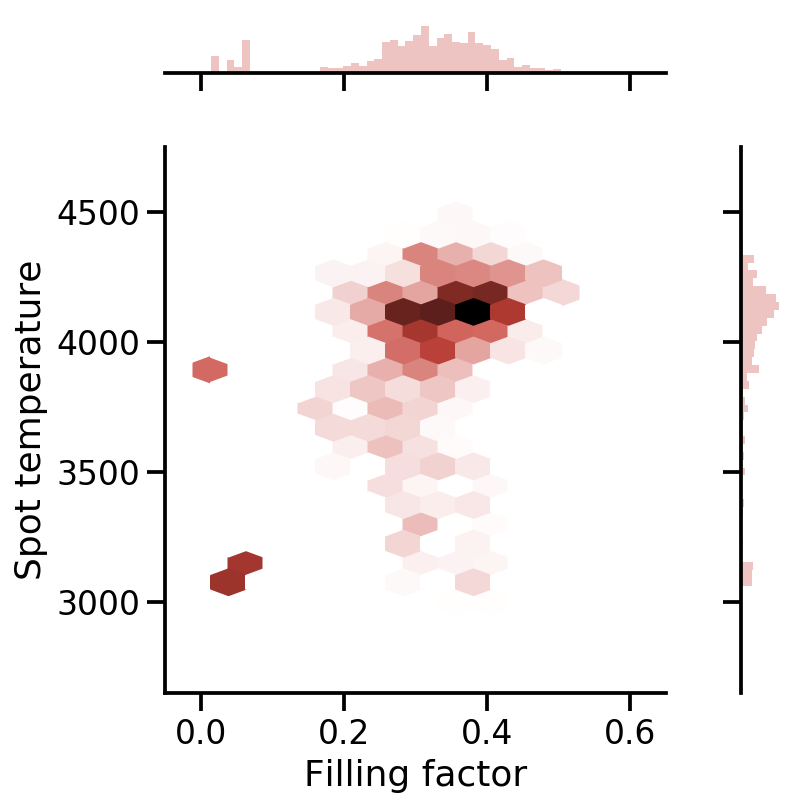

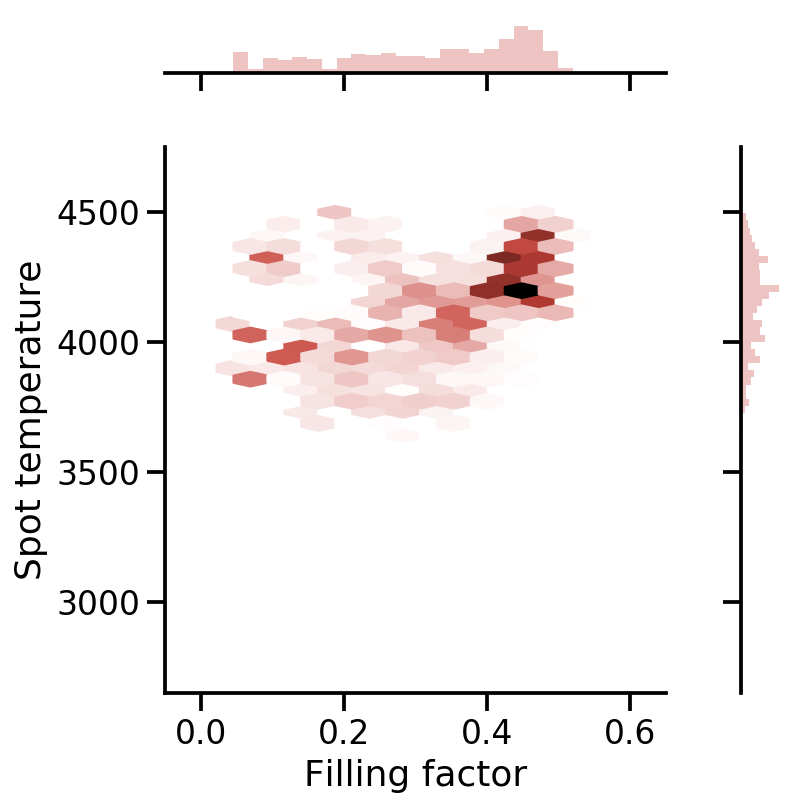

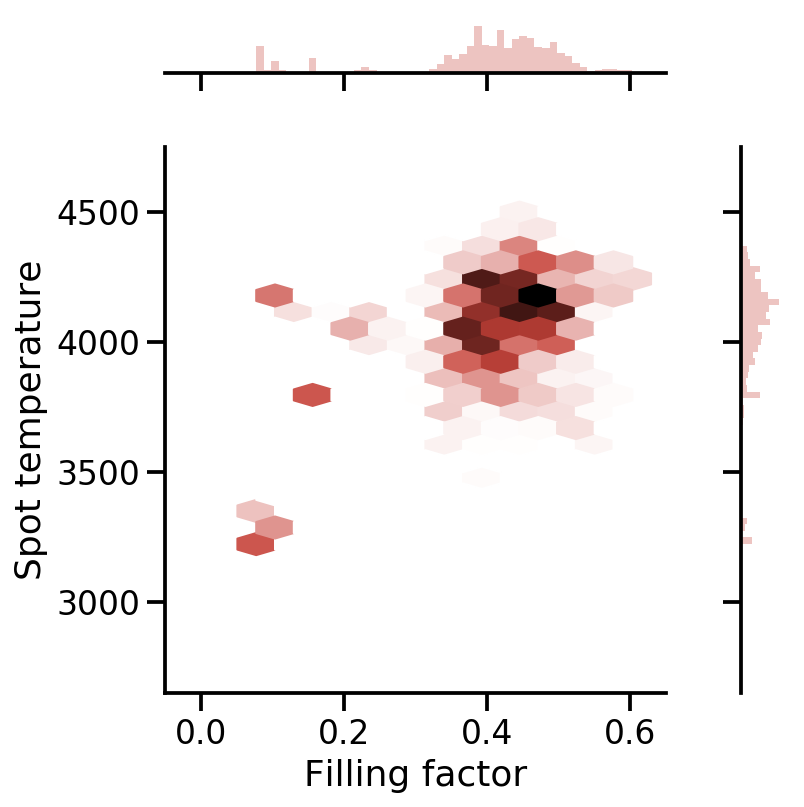

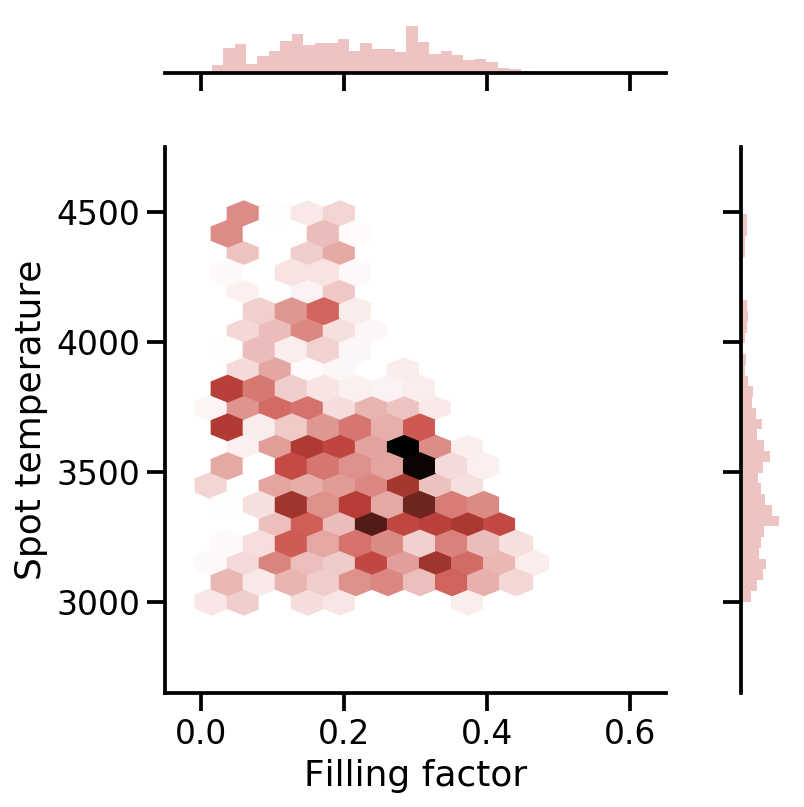

In [34]:
ii = -1

sns.set_context("talk")

for i in range(len(ms)):
    ii += 1
    print(ii)
    m = ms[ii]
    
    try:
        ws = np.load("../sf/m{:03d}/output/mix_emcee/run02/emcee_chain.npy".format(m))
    except:
        ws = np.load("../sf/m{:03d}/output/mix_emcee/run01/emcee_chain.npy".format(m))
    burned = ws[:, -200:,:]
    #I'm only keeping the last 200 samples because that's what Gully did for the spectra plots
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    f_omega = 10**fc[:, 7]/(10**fc[:, 7]+10**fc[:, 5])
    burnedT2 = ws[:, -200:, 6] 
    Txs, Tys = burnedT2.shape
    T2 = burnedT2.reshape(Txs*Tys)
    
    #p = sns.jointplot(f_omega, T2, kind='kde', color="#D36C65", clip=((0.0,0.6),(2700,4700)), xlim=[-0.05, 0.65], ylim=[2650, 4750])
    p = sns.jointplot(f_omega, T2, kind='hex', color="#D36C65", gridsize=(10,10), xlim=[-0.05, 0.65], ylim=[2650, 4750])
    #plt.figure()
    #sns.kdeplot(f_omega, T2, cmap=pal)
    #plt.xlabel("Filling factor")
    #plt.ylabel("Spot temperature (K)")
    p.set_axis_labels("Filling factor", "Spot temperature")
    #p.ax_joint.text(np.min(f_omega), np.max(T2), "m = {}".format(m))
    plt.tight_layout()
    #plt.savefig('../document/figures/Tspot_fillingfactor_m{}_AAS.pdf'.format(m), bbox_inches='tight', dpi=300, transparent=True)
    plt.savefig('../document/figures/Tspot_fillingfactor_m{}_AAS_hex.pdf'.format(m), bbox_inches='tight', dpi=300, transparent=True)


I like the KDE plots better.